In [89]:
import pandas as pd
import numpy as np
import tellurium as te
from odbm.odbm import ModelBuilder
import matplotlib.pyplot as plt


In [90]:
model_species = pd.read_excel('Examples/multi_enzyme_model.xlsx', sheet_name = 'Species & Base Mechanisms', engine = 'openpyxl')
model_rxns = pd.read_excel('Examples/multi_enzyme_model.xlsx', sheet_name = 'Reaction', engine = 'openpyxl')

In [101]:
modelfile = 'multi_enzyme_model.txt'
myModel = ModelBuilder(model_species, model_rxns)
myModel.saveModel(modelfile)

model = open(modelfile,'r').read()
r  = te.loada(model)

sdaV = list(map(lambda x:x.upper(),model_species[['Sda' in s for s in model_species['Label']]]['Label']))
pcxV = list(map(lambda x:x.upper(),model_species[['PCX' in s for s in model_species['Label']]]['Label']))
mdhV = list(map(lambda x:x.upper(),model_species[['Mdh' in s for s in model_species['Label']]]['Label']))

enzymeInit = 0.005

In [111]:
results = []

for sda in sdaV:
    for pcx in pcxV:
        for mdh in mdhV:
            r['['+sda+']'] = enzymeInit
            r['['+pcx+']'] = enzymeInit
            r['['+mdh+']'] = enzymeInit
            
            s = r.simulate(0,500,100)
            time = s[:,0]
            serine = s[:,1]
            pyruvate = s[:,3]
            oxaloacetate = s[:,4]
            malate = s[:,-1]
            results.append([time,serine,pyruvate,oxaloacetate,malate])
            r.reset()
            
            

In [112]:
s

       time,     [SERINE],   [CO2], [PYRUVICACID], [OXALOACETICACID],      [ATP],    [ADP],       [NADH], [NAD_plus],  [SDA_MSMEG], [SDA_BSUB], [SDA_ECOLI], [SDA_LPNEU], [PCX_RETLI],   [PCX_SCER], [PCX_MSMEG], [PCX_GTHERM], [MDH_ECOLI], [MDH_MDOM], [MDH_REMER], [MDH_TAES],   [NH3], [MALICACID]
 [[       0,           50,      50,            33,                 4,         10,        0,           10,          0,            0,          0,           0,       0.005,           0,            0,           0,        0.005,           0,          0,           0,      0.005,       0,           0],
  [ 5.05051,      37.8356, 49.5592,       44.7237,       0.000495728,    9.55923, 0.440768,      5.55973,    4.44027,            0,          0,           0,       0.005,           0, -8.69684e-24,           0,        0.005,           0,          0, 2.14766e-23,      0.005, 12.1644,     4.44027],
  [  10.101,      25.8925, 49.1195,        56.227,       0.000497104,    9.11951, 0.880491,      5.12001,    4.

In [ ]:
# plot V1
for k,r in model_rxns.iterrows():
    plt.figure()
    for j in myModel.get_substrates(k):
        plt.plot(s['time'],s['['+j+']'], label = j)
        
    for j in myModel.get_products(k):
        plt.plot(s['time'],s['['+j+']'],'--', label = j)  
    plt.legend()


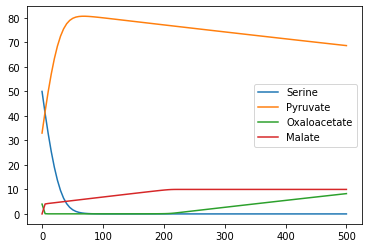

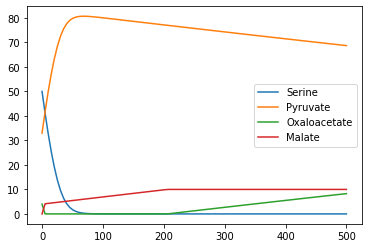

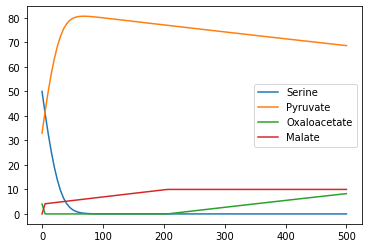

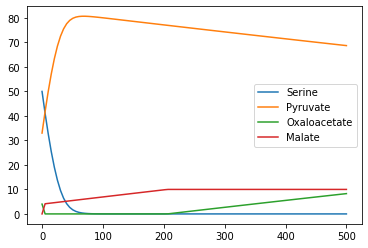

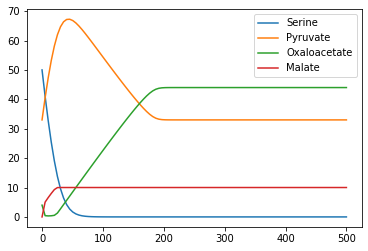

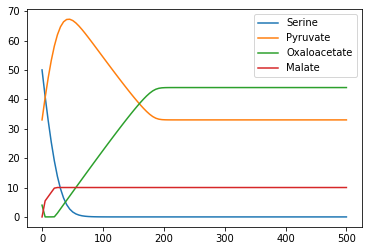

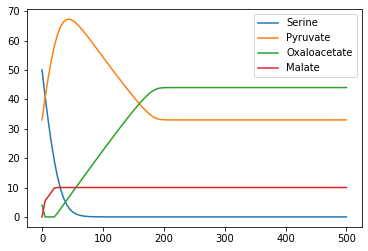

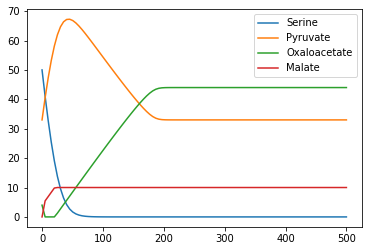

In [113]:

for sim in results[16:24]:
    plt.figure()
    for species in sim[1:]:
        plt.plot(sim[0],species)
    plt.legend(labels = ['Serine','Pyruvate','Oxaloacetate', 'Malate'])

